<a href="https://colab.research.google.com/github/DataEtnos/ANALISES-DE-CUSTO-DE-SEGURO-DE-VIDA/blob/main/ANALISES%20DE%20CUSTO%20DE%20SEGURO%20DE%20VIDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [283]:
#Setup
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt




#machine learning
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, f1_score, recall_score, precision_score
from sklearn.preprocessing import RobustScaler, MinMaxScaler,LabelEncoder, StandardScaler
from sklearn import metrics
import statsmodels.formula.api as smf
import statsmodels.api as sm



In [239]:
df = pd.read_csv("/content/insurance.csv")
df.head(15)

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [240]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1341 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1341 non-null   float64
 3   quantidade_filhos  1341 non-null   int64  
 4   fumante            1341 non-null   object 
 5   regiao             1341 non-null   object 
 6   custos_seguro      1341 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.5+ KB


In [241]:
df.describe()

,idade,imc,quantidade_filhos,custos_seguro
count,1341.000000,1341.000000,1341.000000,1341.000000
mean,39.186428,30.684903,1.092468,13240.734520
std,14.040969,6.107806,1.205254,12112.696927
min,18.000000,15.960000,0.000000,0.000000
25%,27.000000,26.315000,0.000000,4719.524050
50%,39.000000,30.400000,1.000000,9361.326800
75%,51.000000,34.770000,2.000000,16586.497710
max,64.000000,53.130000,5.000000,63770.428010


In [242]:
df.isnull().sum()

,0
idade,0
sexo,3
imc,0
quantidade_filhos,0
fumante,0
regiao,0
custos_seguro,0


In [243]:
df.dropna(inplace=True)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 0 to 1340
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   idade              1338 non-null   int64  
 1   sexo               1338 non-null   object 
 2   imc                1338 non-null   float64
 3   quantidade_filhos  1338 non-null   int64  
 4   fumante            1338 non-null   object 
 5   regiao             1338 non-null   object 
 6   custos_seguro      1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


In [245]:
for column in df.columns:
  print(df[column].value_counts())
  print('\n')

idade
18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: count, dtype: int64


sexo
male      676
female    662
Name: count, dtype: int64


imc
32.300    13
28.310     9
30.875     8
31.350     8
28.880     8
          ..
46.700     1
46.200     1
23.800     1
44.770     1
30.970     1
Name: count, Length: 549, dtype: int64


quantidade_filhos
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64


fumante
no     1064
yes     274
Name: count, dtype: int64


regiao
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64


custos_seguro
1639.56310     2


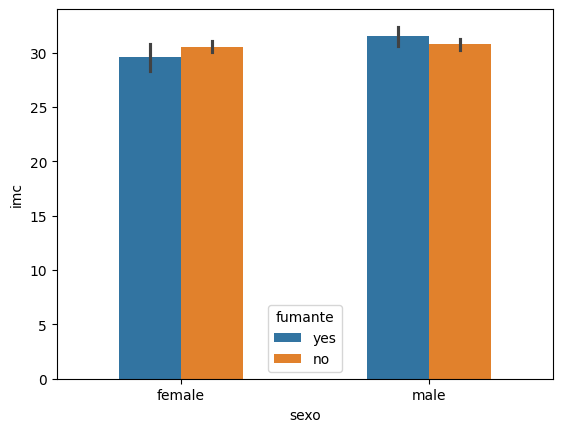

In [246]:
#comparação de fumantes imc  por sexo
bar_plot = sns.barplot(data=df, x='sexo', y='imc', hue='fumante',width = 0.5)

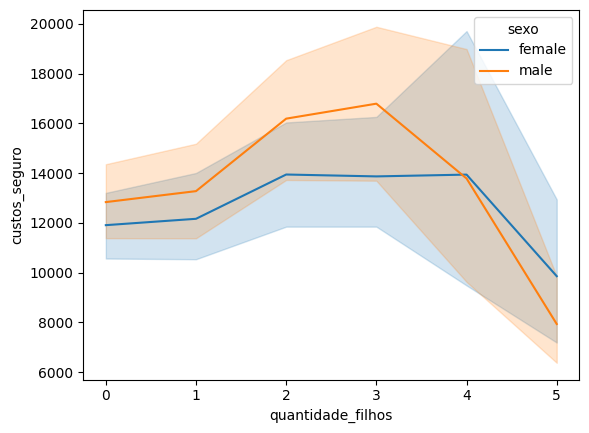

In [247]:
lineplot = sns.lineplot(data=df, x='quantidade_filhos', y='custos_seguro', hue='sexo')

(array([287., 249., 205., 193.,  71.,  58.,  46.,  40.,  25.,  10.,  25.,
         34.,  30.,  27.,  22.,  10.,   1.,   1.,   2.,   2.]),
 array([ 1121.8739   ,  4254.3016055,  7386.729311 , 10519.1570165,
        13651.584722 , 16784.0124275, 19916.440133 , 23048.8678385,
        26181.295544 , 29313.7232495, 32446.150955 , 35578.5786605,
        38711.006366 , 41843.4340715, 44975.861777 , 48108.2894825,
        51240.717188 , 54373.1448935, 57505.572599 , 60638.0003045,
        63770.42801  ]),
 <BarContainer object of 20 artists>)

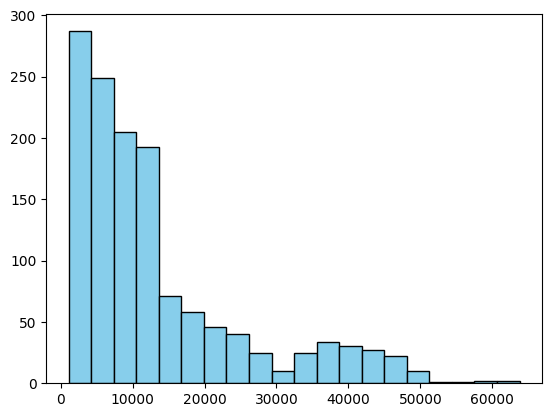

In [248]:
plt.hist(df['custos_seguro'], bins=20, color='skyblue', edgecolor='black')

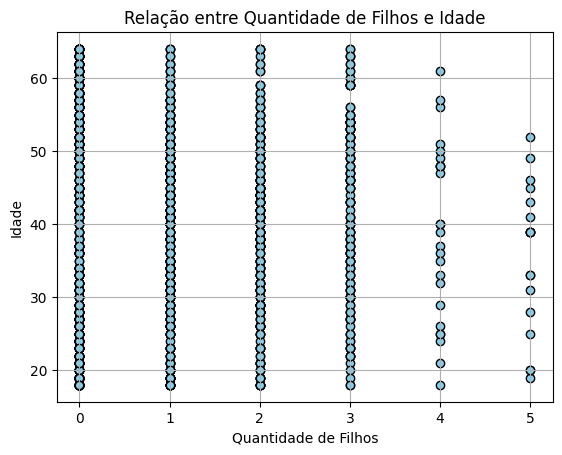

In [249]:
plt.scatter(df['quantidade_filhos'], df['idade'], color='skyblue', edgecolor='black')


plt.title('Relação entre Quantidade de Filhos e Idade')
plt.xlabel('Quantidade de Filhos')
plt.ylabel('Idade')
plt.grid(True)


plt.show()

In [250]:
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.560,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [251]:
scaler = MinMaxScaler()
df[['idade', 'quantidade_filhos', 'imc', 'custos_seguro']] = scaler.fit_transform(df[['idade', 'quantidade_filhos', 'imc', 'custos_seguro']])

In [252]:
df.head()

,idade,sexo,imc,quantidade_filhos,fumante,regiao,custos_seguro
0,0.021739,female,0.321227,0.0,yes,southwest,0.251611
1,0.000000,male,0.479150,0.2,no,southeast,0.009636
2,0.217391,male,0.473500,0.6,no,southeast,0.053115
3,0.326087,male,0.181464,0.0,no,northwest,0.333010
4,0.304348,male,0.347592,0.0,no,northwest,0.043816


In [253]:
df.describe()

,idade,imc,quantidade_filhos,custos_seguro
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,0.461022,0.395583,0.218984,0.193916
std,0.305434,0.164067,0.241099,0.193301
min,0.000000,0.000000,0.000000,0.000000
25%,0.195652,0.278080,0.000000,0.057757
50%,0.456522,0.388485,0.200000,0.131849
75%,0.717391,0.504002,0.400000,0.247700
max,1.000000,1.000000,1.000000,1.000000


In [254]:
from sklearn.preprocessing import  OrdinalEncoder
X = df.drop('custos_seguro', axis=1)
y = df['custos_seguro']
encoder = OrdinalEncoder()
X['sexo'] = encoder.fit_transform(X[['sexo']])
X['fumante'] = encoder.fit_transform(X[['fumante']])
X['regiao'] = encoder.fit_transform(X[['regiao']])



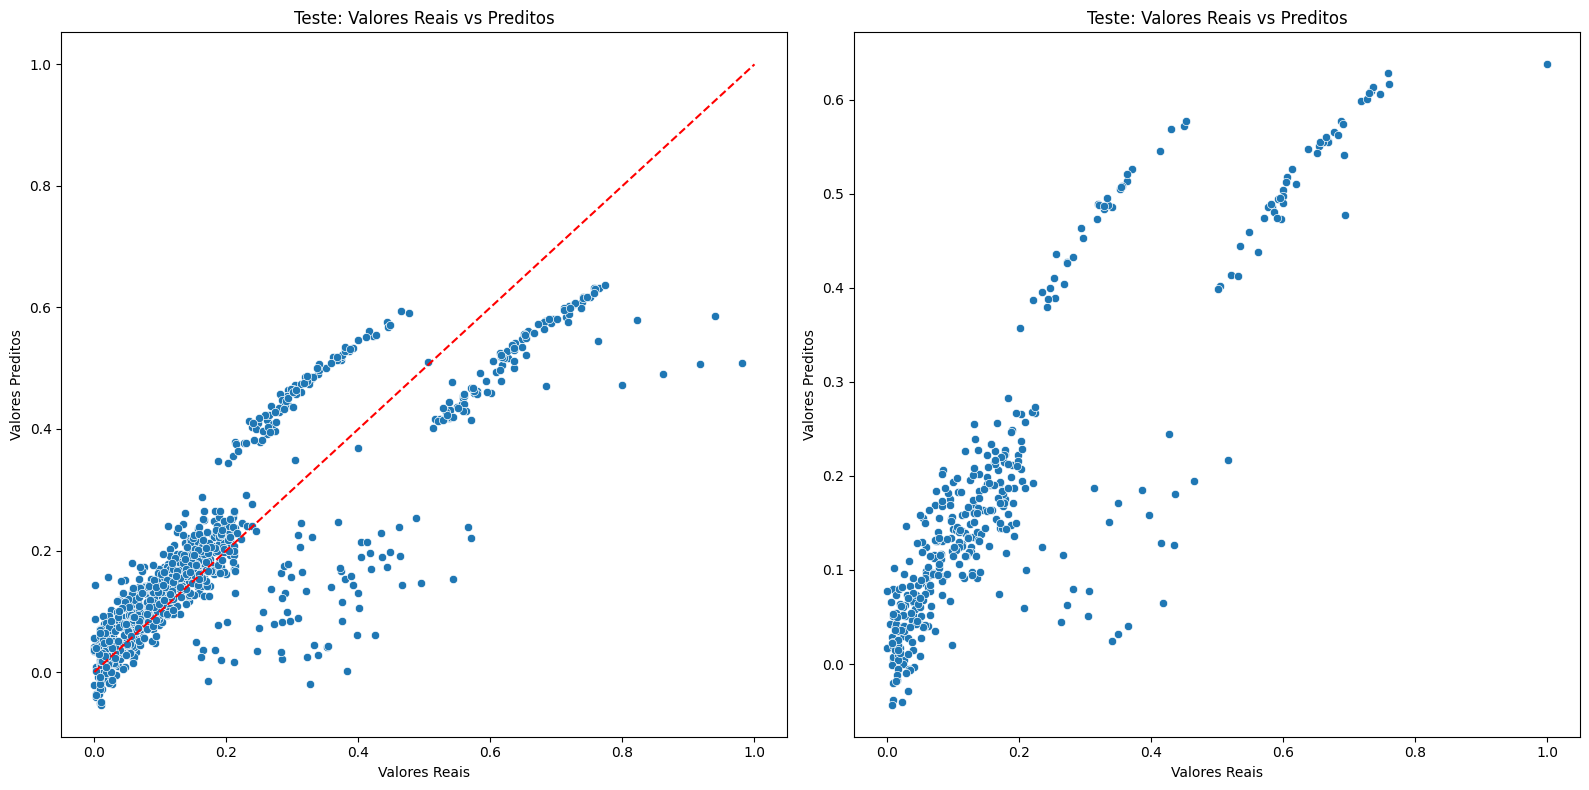

In [273]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 2)
sns.scatterplot(x=y_test, y= Y_test_pred)
plt.title('Teste: Valores Reais vs Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_train, y= Y_train_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Linha de igualdade
plt.title('Teste: Valores Reais vs Preditos')
plt.xlabel('Valores Reais')
plt.ylabel('Valores Preditos')

plt.tight_layout()
plt.show()

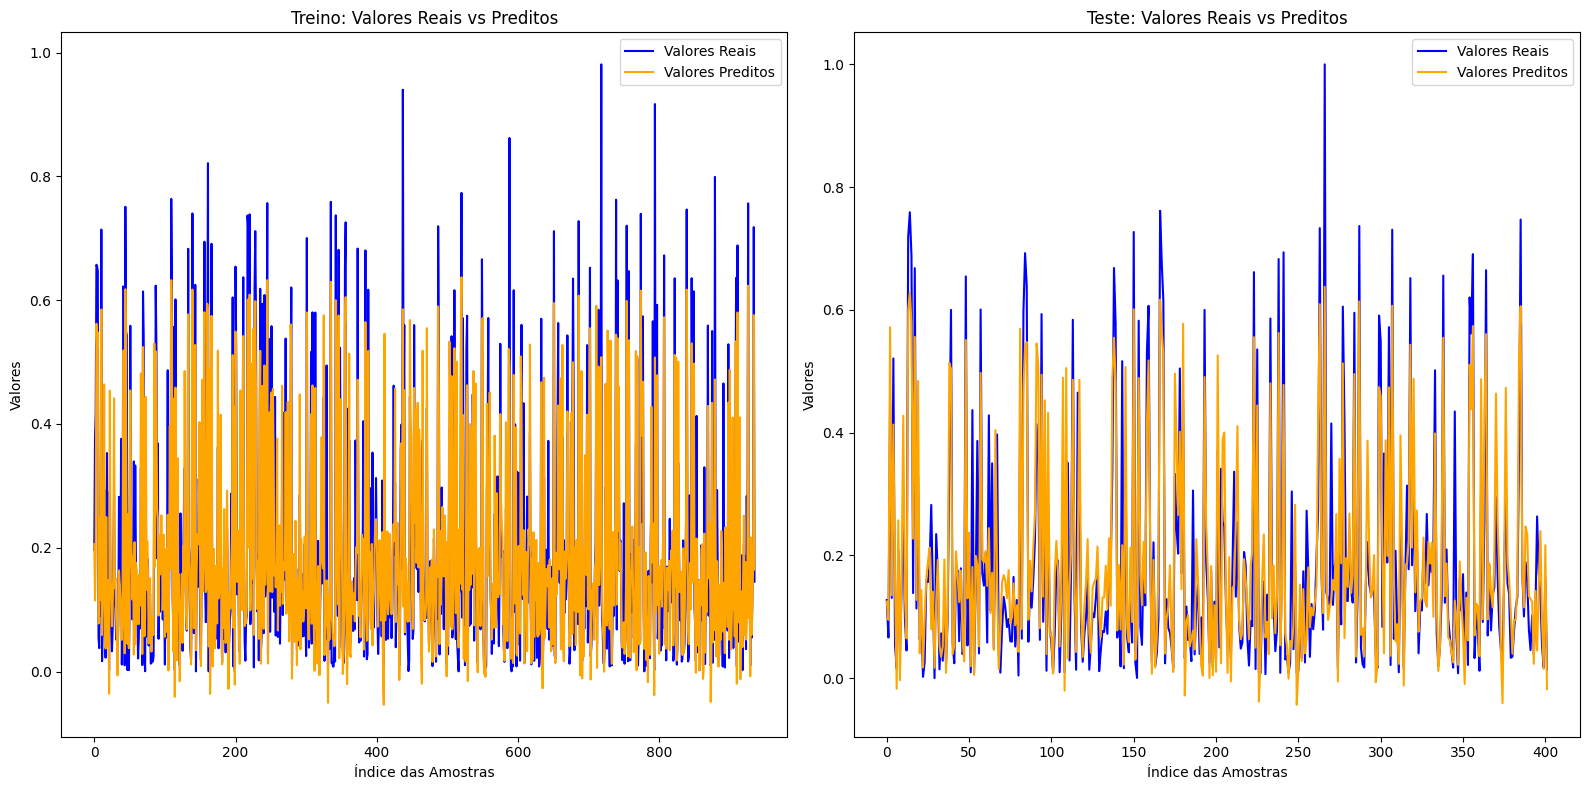

In [274]:
plt.figure(figsize=(16, 8))

plt.subplot(1, 2, 2)
plt.plot(y_test.values, label='Valores Reais', color='blue')
plt.plot(Y_test_pred, label='Valores Preditos', color='orange')
plt.title('Teste: Valores Reais vs Preditos')
plt.xlabel('Índice das Amostras')
plt.ylabel('Valores')
plt.legend()

# Gráfico de linha para o conjunto de treino
plt.subplot(1, 2, 1)
plt.plot(y_train.values, label='Valores Reais', color='blue')
plt.plot(Y_train_pred, label='Valores Preditos', color='orange')
plt.title('Treino: Valores Reais vs Preditos')
plt.xlabel('Índice das Amostras')
plt.ylabel('Valores')
plt.legend()

# Ajustando o layout
plt.tight_layout()
plt.show()